In [ ]:
import pandas as pd

# Cargar los datos desde el archivo CSV
archivo = r'..\datos_procesados.csv'
df = pd.read_csv(archivo)


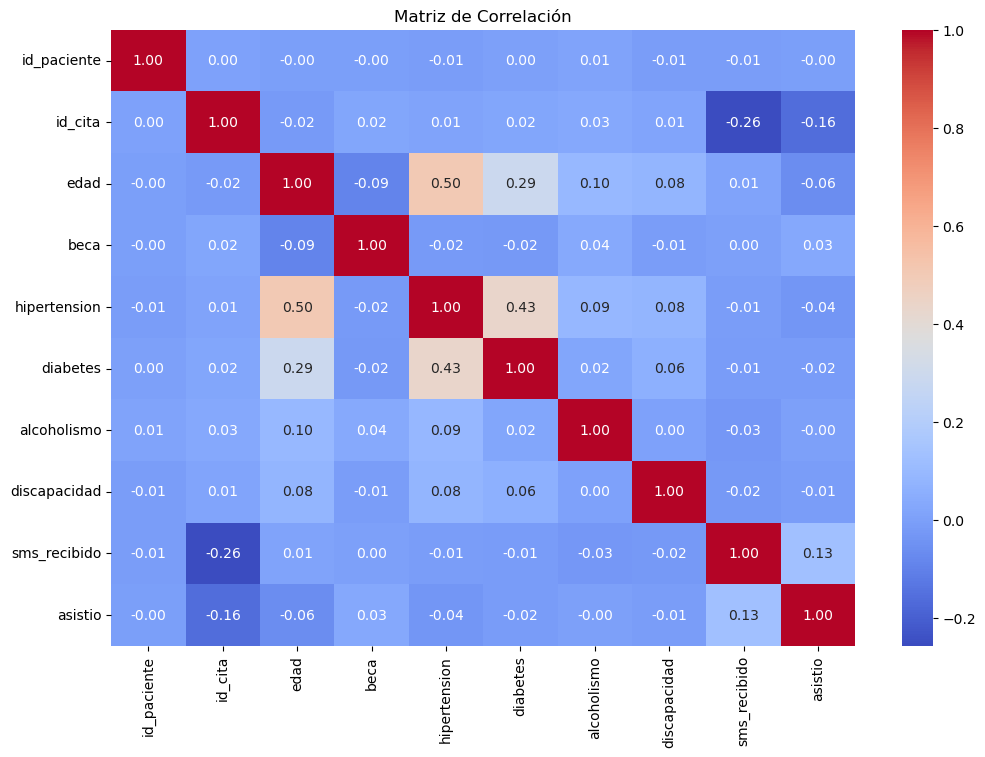

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

<Figure size 1500x1000 with 0 Axes>

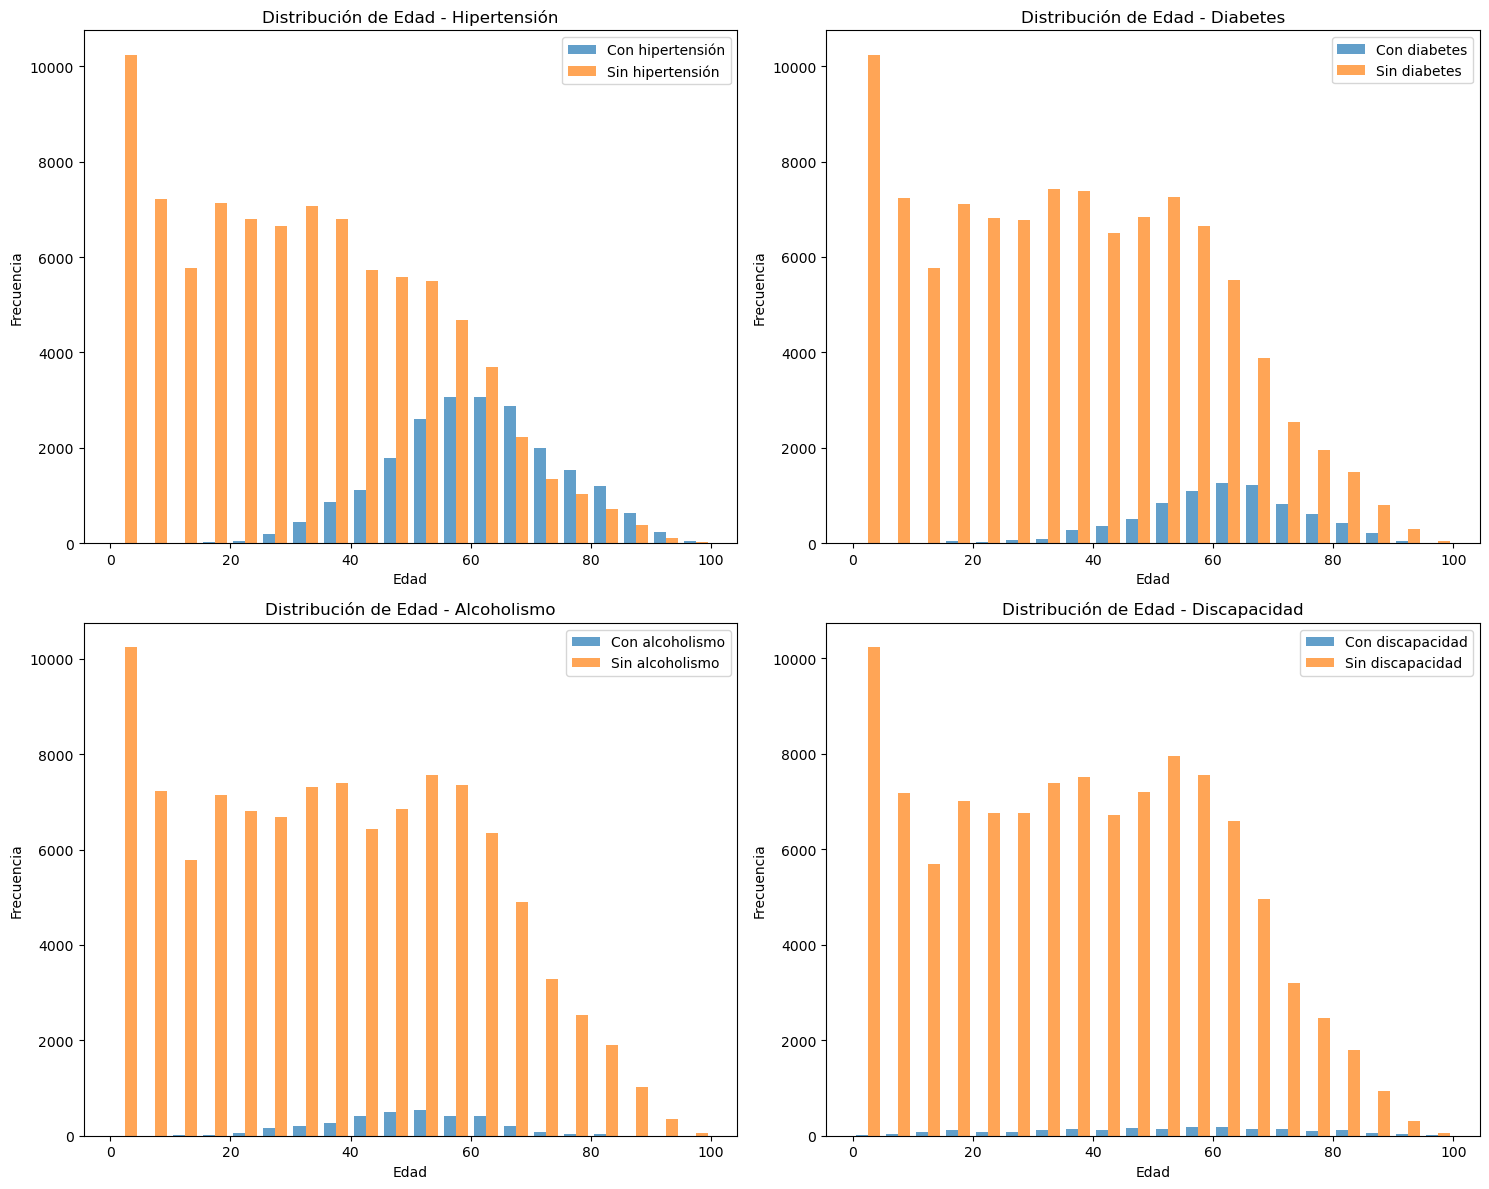

In [24]:
#Distribución de edades por cada tipo de condición médica

plt.figure(figsize=(15, 10))
#subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# para hipertensión
axes[0,0].hist([df[df['hipertension']==1]['edad'], df[df['hipertension']==0]['edad']], 
               bins=20, alpha=0.7, label=['Con hipertensión', 'Sin hipertensión'])
axes[0,0].set_title('Distribución de Edad - Hipertensión')
axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].legend()

# para diabetes
axes[0,1].hist([df[df['diabetes']==1]['edad'], df[df['diabetes']==0]['edad']], 
               bins=20, alpha=0.7, label=['Con diabetes', 'Sin diabetes'])
axes[0,1].set_title('Distribución de Edad - Diabetes')
axes[0,1].set_xlabel('Edad')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# para alcoholismo
axes[1,0].hist([df[df['alcoholismo']==1]['edad'], df[df['alcoholismo']==0]['edad']], 
               bins=20, alpha=0.7, label=['Con alcoholismo', 'Sin alcoholismo'])
axes[1,0].set_title('Distribución de Edad - Alcoholismo')
axes[1,0].set_xlabel('Edad')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].legend()

# para discapacidad
axes[1,1].hist([df[df['discapacidad']==1]['edad'], df[df['discapacidad']==0]['edad']], 
               bins=20, alpha=0.7, label=['Con discapacidad', 'Sin discapacidad'])
axes[1,1].set_title('Distribución de Edad - Discapacidad')
axes[1,1].set_xlabel('Edad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()

plt.tight_layout()
plt.show()

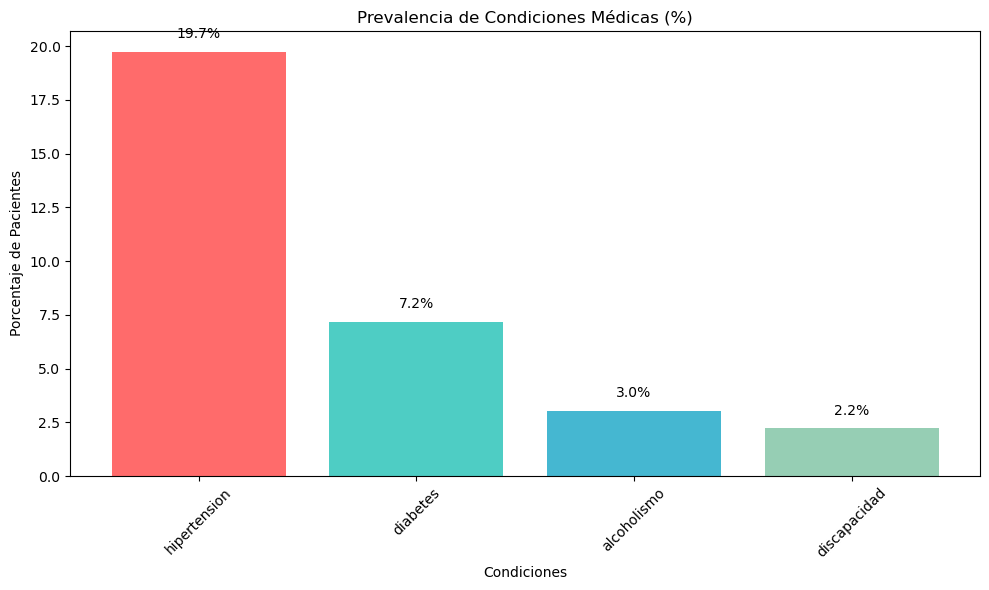

In [ ]:
#Prevalencia de condiciones médicas (que porcentaje de pacientes tienen cada condición)
condiciones = ['hipertension', 'diabetes', 'alcoholismo', 'discapacidad']
prevalencias = [df[col].mean() * 100 for col in condiciones]

plt.figure(figsize=(10, 6))
bars = plt.bar(condiciones, prevalencias, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Prevalencia de Condiciones Médicas (%)')
plt.ylabel('Porcentaje de Pacientes')
plt.xlabel('Condiciones')

for bar, val in zip(bars, prevalencias):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

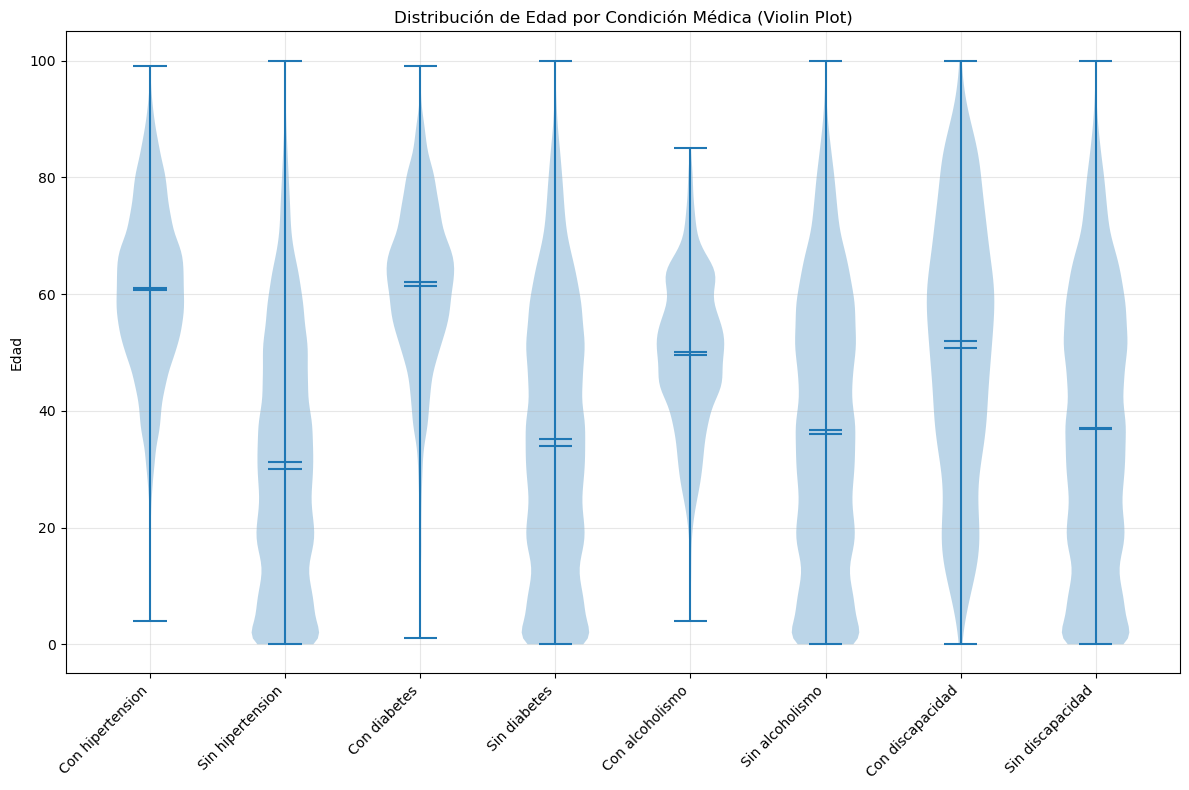

In [28]:
#Gráfico de violín (es oracticamente lo mismo que un boxplot) para comparar distribuciones
plt.figure(figsize=(12, 8))


violin_data = []  
violin_labels = []

condiciones = ['hipertension', 'diabetes', 'alcoholismo', 'discapacidad']
for i, condicion in enumerate(condiciones):
    edades_con = df[df[condicion]==1]['edad']
    edades_sin = df[df[condicion]==0]['edad']
    
    violin_data.extend([edades_con, edades_sin])
    violin_labels.extend([f'Con {condicion}', f'Sin {condicion}'])

positions = list(range(1, len(violin_data) + 1))
parts = plt.violinplot(violin_data, positions=positions, showmeans=True, showmedians=True)

plt.xticks(positions, violin_labels, rotation=45, ha='right')
plt.ylabel('Edad')
plt.title('Distribución de Edad por Condición Médica (Violin Plot)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()